In [4]:
import pandas as pd

In [5]:
dataset=pd.read_csv('insurance_pre.csv')

In [6]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [7]:
dataset=pd.get_dummies(dataset, dtype=int, drop_first=True)

In [8]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [9]:
independent=dataset[['age','bmi','children','sex_male','smoker_yes']]
dependent=dataset[['charges']]

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.3,random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [12]:
x_test

array([[ 0.89459283, -0.08863026, -0.06746417,  1.02378711, -0.50466988],
       [ 0.53757957, -0.22180837, -0.06746417, -0.97676557, -0.50466988],
       [ 0.60898222,  1.57449152,  0.76341038,  1.02378711,  1.98149332],
       ...,
       [ 1.10880078,  1.20785059, -0.89833872,  1.02378711, -0.50466988],
       [ 1.75142463,  1.34905148, -0.06746417,  1.02378711, -0.50466988],
       [ 1.60861933, -0.92299913, -0.89833872, -0.97676557, -0.50466988]])

In [13]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='poisson',splitter='random')

In [14]:
regressor.fit(x_train,y_train)

DecisionTreeRegressor(criterion='poisson', splitter='random')

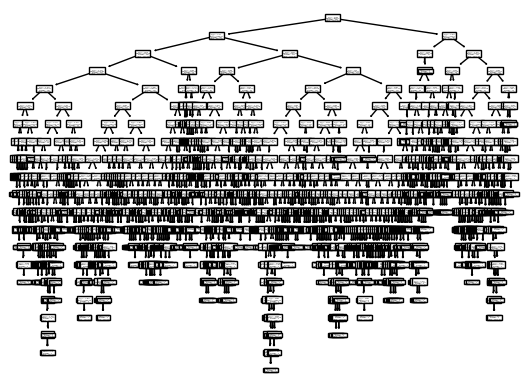

In [15]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()


In [16]:
y_pred=regressor.predict(x_test)
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)
r_score

0.7473406307633964

In [93]:
import pickle
final_model='finalized_DecisionTree_model'
pickle.dump(regressor,open(final_model,'wb'))


In [94]:
loaded_model=pickle.load(open('finalized_DecisionTree_model','rb'))
result=loaded_model.predict([[29,29,1,1,0]])
result

array([63770.42801])